<h3>Statement of Problem</h3>
<u>Dataset:  compost.dat</u>
Source: P.D. Schloss, B. Chaves, L.P. Walker (2000). "The Use of the Analysis of Variance to Assess the Influence of Mixing During Composting," Process Biochemistry, Vol. 35, pp. 675-684.<br><br>
Description Results of experiments to measure temperatures in compost reactors under 4 mixing conditions (Static, every 24hr, 96hr, 192hr).<br>
Two experiments (nested w/in treatments), two trials (nested w/in experiments), 5 reps per trial.<br><br>
Authors did not obtain trial effects in ANOVA.<br>
Variables/Columns:<br>
Mixing Condition - 8<br>
Experiment(Condition) - 16<br>
Trial (Experiment)- 24<br>
Temperature - 28-32<br>
http://www.stat.ufl.edu/~winner/data/compost.dat, http://www.stat.ufl.edu/~winner/data/compost.txt

<h3>Analyzing data</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats

In [3]:
data=pd.DataFrame(pd.read_csv("C:\\Users\\zaina\\Documents\\DataVisulaization_MachineLearning\\Research\\compost.csv"))

In [4]:
data.head()

,Sample,Mixing Condition,Experiment Condition,Trial Experiment,Temp
0,1,1,1,1,43.7
1,2,1,1,1,42.9
2,3,1,1,1,44.0
3,4,1,1,1,44.3
4,5,1,1,1,44.4


In [5]:
data.columns = map(str.upper, data.columns)

In [6]:
data.tail()

,SAMPLE,MIXING CONDITION,EXPERIMENT CONDITION,TRIAL EXPERIMENT,TEMP
75,76,4,2,2,42.9
76,77,4,2,2,43.9
77,78,4,2,2,41.5
78,79,4,2,2,40.8
79,80,4,2,2,39.3


In [7]:
table = data.pivot_table( index=['EXPERIMENT CONDITION','TRIAL EXPERIMENT'], 
                         columns=['MIXING CONDITION'], values=['TEMP'])
print table

                                        TEMP                     
MIXING CONDITION                           1      2      3      4
EXPERIMENT CONDITION TRIAL EXPERIMENT                            
1                    1                 43.86  41.24  39.00  40.96
                     2                 33.26  65.54  38.30  41.60
2                    1                 60.24  45.90  44.78  48.28
                     2                 34.28  66.60  35.98  41.68


In [8]:
data = data.dropna()
data1=data[['MIXING CONDITION','EXPERIMENT CONDITION','TEMP']]
print "Mean:\n"
print data1.mean()

Mean:

MIXING CONDITION         2.50000
EXPERIMENT CONDITION     1.50000
TEMP                    45.09375
dtype: float64


In [9]:
print "Median:\n"
print data1.median()

Median:

MIXING CONDITION         2.5
EXPERIMENT CONDITION     1.5
TEMP                    41.8
dtype: float64


In [10]:
print "Standard Deviation:\n"
print data1.std()

Standard Deviation:

MIXING CONDITION         1.125088
EXPERIMENT CONDITION     0.503155
TEMP                    10.110107
dtype: float64


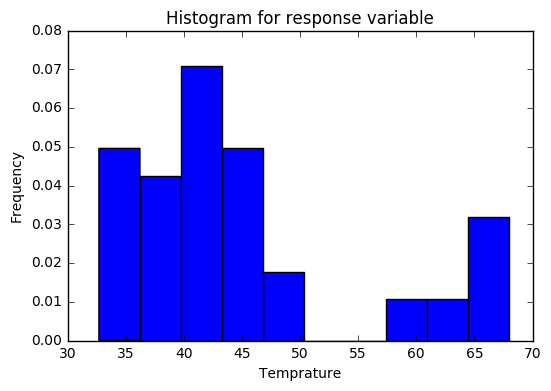

In [11]:
plt.hist(data.TEMP,normed=1)
plt.xlabel('Temprature')
plt.ylabel('Frequency')
plt.title('Histogram for response variable')
plt.show()

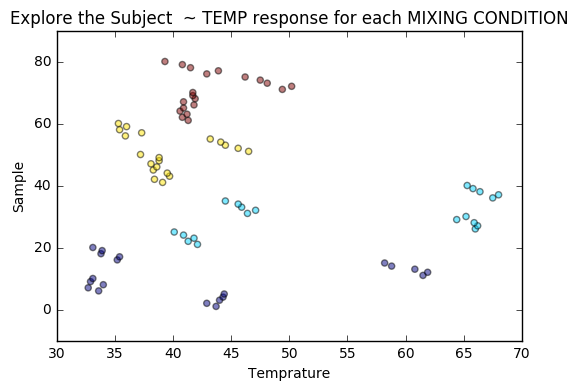

In [12]:
fig=plt.scatter(data.TEMP,data.SAMPLE,c= data['MIXING CONDITION'],alpha=0.5)
plt.ylabel('Sample')
plt.xlabel('Temprature')
plt.title('Explore the Subject  ~ TEMP response for each MIXING CONDITION')
plt.show(fig)

<h3>Run Statistical Model to Test Hypothesis</h3><br>
Conduct an analysis to find differences between:
<ol><li>Factors level </li><li> Interaction between factors</li></ol>

Is there any statistical significant difference between Mixing Condition?<br>
Consider Hypothesis to be test: <br><br>
<u>Testing Hypothesis</u><br>

In [13]:
%%latex
\begin{align}
H_{0}: \mu(Mixing Condition1)=\mu(Mixing Condition2)=\mu(Mixing Condition3)=\mu(Mixing Condition4)\\
H_{a}: \mu(Mixing Condition1)\neq \mu(Mixing Condition2)\neq \mu(Mixing Condition3)\neq \mu(Mixing Condition4)\\
\end{align}

<IPython.core.display.Latex object>

<li>Step1: Normality Test</li>

In [14]:
c1=data[data["MIXING CONDITION"]==1]
c2=data[data["MIXING CONDITION"]==2]
c3=data[data["MIXING CONDITION"]==3]
c4=data[data["MIXING CONDITION"]==4]

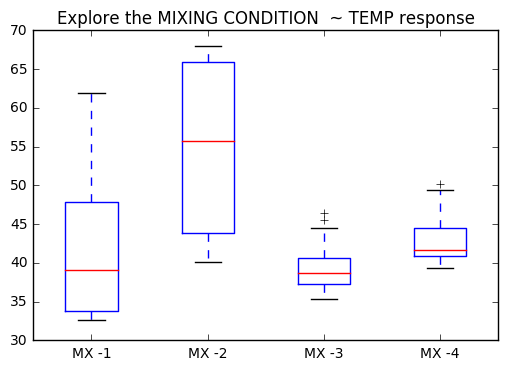

In [15]:
temp=[c1.TEMP,c2.TEMP,c3.TEMP,c4.TEMP]
plt.boxplot(temp)
plt.xticks([1,2,3,4],['MX -1','MX -2','MX -3','MX -4'])
plt.title('Explore the MIXING CONDITION  ~ TEMP response')
plt.show()

<li>MIXING CONDITION-2, MIXING CONDITION-3 and MIXING CONDITION-4 seems normally distributed, MIXING CONDITION-1 have long left tail.<br> 
Box plots are overlapping, but not all medians so there is likely to be a difference between both groups.<br></li>

In [30]:
print ("MX-1 :",stats.shapiro(c1.TEMP,reta=False),'MX-2 :' ,stats.shapiro(c2.TEMP,reta=False),
       "MX-3 :",stats.shapiro(c3.TEMP,reta=False),"MX-4 :",stats.shapiro(c4.TEMP,reta=False)) 

('MX-1 :', (0.6992236375808716, 9.453636096168339e-08), 'MX-2 :', (0.8998045325279236, 0.0018868515035137534), 'MX-3 :', (0.8837211728096008, 0.02065316215157509), 'MX-4 :', (0.8074211478233337, 0.0011170626385137439))


<li><font color='blue'><b>Shapiro test detects all "departures from normality" ,
pvalue < 0.05 shows 95% confident that MIXING CONDITION-1, MIXING CONDITION -2, MIXING CONDITION -
3 and MIXING CONDITION -4 is not normally distributed  or is consequences of few samples.</b></font></li>

<li>Normality Test for residuals</li>

In [31]:
from statsmodels.formula.api import ols
lm = ols('data.TEMP ~ C(data["MIXING CONDITION"], Sum)', data=data).fit()
res=lm.resid
stats.shapiro(res,reta=False)

(0.9598994255065918, 0.01326023694127798)

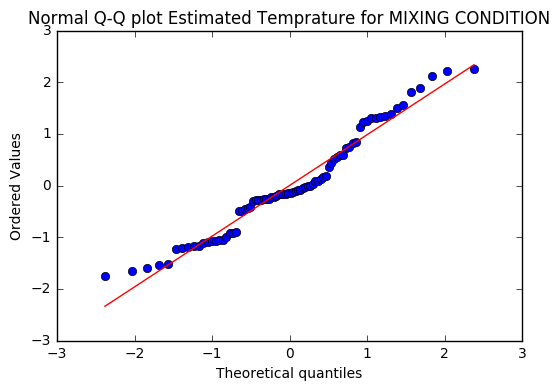

In [32]:
# Q-Q Plot residuals
res=lm.resid_pearson
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot Estimated Temprature for MIXING CONDITION")
plt.show()

<font color='blue'><b><li>pvalue < 0.05 shows residuals not come from normal distribution. Also Q-Q plot of residual Vs distribution are close fit,  and for most of population sample result it fails </li></b></font>

<li>Step2 : Homoscedasticity </li>

In [33]:
stats.levene(c1.TEMP,c2.TEMP,c3.TEMP,c4.TEMP,center='mean')

LeveneResult(statistic=7.0847834732687343, pvalue=0.00020550848516277736)

In [34]:
stats.levene(c1.TEMP,c2.TEMP,c3.TEMP,c4.TEMP,center='median')

LeveneResult(statistic=5.7264612779622404, pvalue=0.001087629982710529)

<li><font color='blue'><b>pvalue > 0.05 indicates all MIXING CONDITION has significant difference in TARGET TEMP , which indicates violation of homogeneity of variance </font></b> </li>

<h3>ANOVA </h3>
Within Subjects Measure: the same subjects were measured in several different  Mixing Condition.

In [35]:
from numpy.random import normal
import pyvttbl as pt
from collections import namedtuple
df1=pt.DataFrame(data)  
aov = df1.anova('TEMP', sub='SAMPLE', wfactors=['MIXING CONDITION'])
print(aov)


TEMP ~ MIXING CONDITION

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: TEMP
        Source                                 Type III    eps      df        MS        F       Sig.      et2_G   Obs.    SE     95% CI   lambda   Obs.  
                                                  SS                                                                                               Power 
MIXING CONDITION          Sphericity Assumed    671.737       -         3   223.912   9.856   3.773e-06   0.091     80   0.536    1.050    9.980   0.752 
                          Greenhouse-Geisser    671.737   0.695     2.086   322.098   9.856   7.029e-05   0.091     80   0.536    1.050    9.980   0.636 
                          Huynh-Feldt           671.737   0.695     2.086   322.098   9.856   7.029e-05   0.091     80   0.536    1.050    9.980   0.636 
                          Box                   671.737   0.333         1   671.737   9.856       0.002   0.091     80   0.536    1.050    9.980   0.437 
---

In [36]:
import re
from copy import copy
from md5 import md5

def extract_for_apa(factor, aov, values = ['F', 'mse', 'eta', 'p']):
    results = {}
    for key,result in aov[(factor,)].iteritems():
        if key in values:
            results[key] = result
            
    return results

In [37]:
results=extract_for_apa('MIXING CONDITION', aov, values = ['F', 'mse', 'eta', 'p'])

In [38]:
print results

{'p': 3.7733171463077259e-06, 'mse': 22.719231276371314, 'eta': 0.090736207808066169, 'F': 9.8556348669042517}


<li><font color='blue'><b>In these results, the null hypothesis states that the mean TEMPRATURE values of 4 different MIXING CONDITION's are equal. Because the p-value is 0.00000377 , which is less than the significance level of 0.05, we can reject the null hypothesis and conclude that some MIXING CONDITION  have significant different mean.</b></font></li>

In [39]:
import statsmodels.stats.multicomp as multi
mc = multi.MultiComparison( data['TEMP'],data['MIXING CONDITION'])
result =mc.tukeyhsd()
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  1      2     11.91    4.9156  18.9044  True 
  1      3     -3.395  -10.3894  3.5994 False 
  1      4      0.22   -6.7744   7.2144 False 
  2      3    -15.305  -22.2994 -8.3106  True 
  2      4     -11.69  -18.6844 -4.6956  True 
  3      4     3.615   -3.3794  10.6094 False 
----------------------------------------------
[1 2 3 4]


p-value tells us how likely it is that we were wrong in rejecting our null hypothesis. Therotically, for p < 0.05,  less than 5% - meaning a 5% chance of making a type I error (rejecting the null hypothesis even though it is true).
When we compare subsets of data, higher the chances to find some random effect - for only 4 tests, the probability of making at least one mistake is already (0.05/4) i.e. 0.0125 which is much lesser than 0.05 .
The goal of using the Bonferroni adjustment, is to control the family-wise error rate, also known as the maximum overall type 1 error rate. So that we can evaluate which pairs of MIXING CONDITION dependence rates are different from one another. <br>
The result summary above shows that the FWER was taken into account automatically, and then lists all the group-wise comparisons, their differences, and whether or not we can reject the null hypothesis (that both groups have equal means). <br>
<b><font color='blue'>The Post-hoc test for multi-comparision for MIXING CONDITION results that MIXING CONDITION-2 have significantly different mean.<br>
From a statistics point of view, it’s quite safe to say that there is a significant difference in the TEMPRATURE for different MIXING CONDITION with F(3, 79) = 9.85 (the numbers in brackets are degrees of freedom, df model and df residuals, from the ANOVA summary above) and p < 0.05.</b></font>

Consider Hypothesis to be test: <br>
<u>Testing Hypothesis</u><br>

In [40]:
%%latex
\begin{align}
H_{0}: \mu(Experiment Condition1)=\mu(Experiment Condition2)\\
H_{a}: \mu(Experiment Condition1)\neq \mu(Experiment Condition2)\\
\end{align}

<IPython.core.display.Latex object>

<li>Step1: Normality Test</li>

In [41]:
c1=data[data["EXPERIMENT CONDITION"]==1]
c2=data[data["EXPERIMENT CONDITION"]==2]

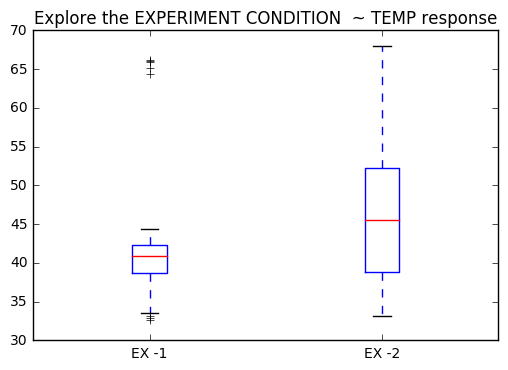

In [42]:
temp=[c1.TEMP,c2.TEMP]
plt.boxplot(temp)
plt.xticks([1,2],['EX -1','EX -2'])
plt.title('Explore the EXPERIMENT CONDITION  ~ TEMP response')
plt.show()

<li>EXPERIMENT CONDITION - 1 seems normally distributed, EXPERIMENT CONDITION -2 have long left tail.<br> 
Box plots are  overlapping, but not both medians so there is likely to be a difference between both groups.<br></li>

In [43]:
print ("EX-1 :",stats.shapiro(c1.TEMP,reta=False),'EX-2 :' ,stats.shapiro(c2.TEMP,reta=False)) 

('EX-1 :', (0.6992236375808716, 9.453636096168339e-08), 'EX-2 :', (0.8998045325279236, 0.0018868515035137534))


<li><font color='blue'><b>Shapiro test detects all "departures from normality" ,pvalue < 0.05 shows 95% confident that EXPERIMENT CONDITION -1 , EXPERIMENT CONDITION -2 is not normally distributed  or is consequences of few samples.</b></font></li>

<li>Normality Test for residuals</li>

In [46]:
lm = ols('data.TEMP ~ C(data["EXPERIMENT CONDITION"], Sum)', data=data).fit()
res=lm.resid
stats.shapiro(res,reta=False)

(0.8520757555961609, 1.90148512047017e-07)

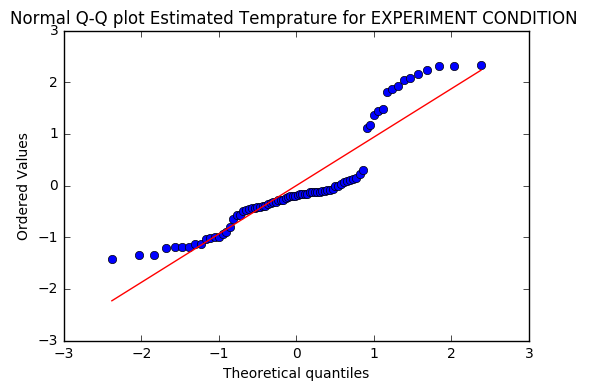

In [47]:
# Q-Q Plot residuals
res=lm.resid_pearson
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot Estimated Temprature for EXPERIMENT CONDITION ")
plt.show()

<li>The pvalue > 0.05 shows residuals come from normal distribution. Also Q-Q plot of residual Vs distribution are not close fit </li>

<li>Step2 : Homoscedasticity </li>

In [65]:
stats.levene(c1.TEMP,c2.TEMP,center='mean')

LeveneResult(statistic=2.8947417038759711, pvalue=0.092852343223282771)

In [66]:
stats.levene(c1.TEMP,c2.TEMP,center='median')

LeveneResult(statistic=3.2248004192962565, pvalue=0.076403268167920063)

<li><font color='blue'><b>pvalue > 0.05 indicates all EXPERIMENT CONDITION has significant difference in TARGET TEMP , which indicates violation of homogeneity of variance</font></b> </li>

In [67]:
#Within Measure

In [68]:
from numpy.random import normal
import pyvttbl as pt
from collections import namedtuple
df1=pt.DataFrame(data)  
aov = df1.anova('TEMP', sub='SAMPLE', wfactors=['EXPERIMENT CONDITION'])
print(aov)

TEMP ~ EXPERIMENT CONDITION

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: TEMP
          Source                                   Type III   eps   df     MS        F     Sig.    et2_G   Obs.    SE     95% CI   lambda   Obs.  
                                                      SS                                                                                    Power 
EXPERIMENT CONDITION          Sphericity Assumed    180.413     -    1   180.413   3.695   0.058   0.023     80   0.793    1.555    3.742   0.480 
                              Greenhouse-Geisser    180.413     1    1   180.413   3.695   0.058   0.023     80   0.793    1.555    3.742   0.480 
                              Huynh-Feldt           180.413     1    1   180.413   3.695   0.058   0.023     80   0.793    1.555    3.742   0.480 
                              Box                   180.413     1    1   180.413   3.695   0.058   0.023     80   0.793    1.555    3.742   0.480 
-----------------------------------------

In [69]:
results=extract_for_apa('EXPERIMENT CONDITION', aov, values = ['F', 'mse', 'eta', 'p'])
print results

{'p': 0.058174075035167659, 'mse': 48.82342879746836, 'eta': 0.022852902073321812, 'F': 3.6952046782374879}


<li><font color='blue'><b>
In these results, the null hypothesis states that the mean TEMPRATURE values of 2 different EXPERIMENT CONDITION's are equal. Because the p-value is 0.058 , which is greater than the significance level of 0.05, we can not reject the null hypothesis and conclude that EXPERIMENT CONDITION  do not have significant difference in means. </b></font></li>

Consider Hypothesis to be test: <br>

In [70]:
%%latex
\begin{align}
H_{0}: No\ interaction \ between\ the\ factors\ \
H_{a}: Interaction \ between \ the \ factors\\
\end{align}

<IPython.core.display.Latex object>

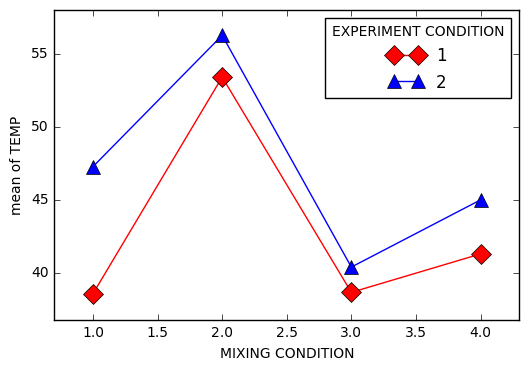

In [71]:
import numpy as np
import statsmodels.graphics.factorplots as sp
fig = sp.interaction_plot(data['MIXING CONDITION'],data['EXPERIMENT CONDITION'],data['TEMP'], 
                          colors=['red','blue'], markers=['D','^'], ms=10)
import matplotlib.pyplot as plt
plt.show()

<li><font color='blue'><b>EXPERIMENT CONDITION-2 has highest mean for all MIXING CONDITION compare to EXPERIMENT CONDITION-1</b></font><li>

<h3><center>More Than Two Factor - ANOVA</center></h3>

In [72]:
from numpy.random import normal
import pyvttbl as pt
from collections import namedtuple
df1=pt.DataFrame(data)  
aov = df1.anova('TEMP', sub='SAMPLE',bfactors=['MIXING CONDITION'])
print(aov)

TEMP ~ MIXING CONDITION

TESTS OF BETWEEN-SUBJECTS EFFECTS

Measure: TEMP
     Source        Type III   df     MS        F        Sig.      et2_G   Obs.    SE     95% CI   lambda   Obs.  
                      SS                                                                                   Power 
MIXING CONDITION   2686.949    3   895.650   12.634   8.736e-07   0.333     20   1.913    3.750    9.974   0.736 
Error              5387.978   76    70.894                                                                       
Total              8074.927   79                                                                                 

TABLES OF ESTIMATED MARGINAL MEANS

Estimated Marginal Means for MIXING CONDITION
MIXING CONDITION    Mean    Std. Error   95% Lower Bound   95% Upper Bound 
1                  42.910        2.493            38.024            47.796 
2                  54.820        2.617            49.691            59.949 
3                  39.515        0.765       

In [49]:
from numpy.random import normal
import pyvttbl as pt
from collections import namedtuple
df1=pt.DataFrame(data)  
aov = df1.anova('TEMP', sub='SAMPLE',bfactors=['EXPERIMENT CONDITION'])
print(aov)

TEMP ~ EXPERIMENT CONDITION

TESTS OF BETWEEN-SUBJECTS EFFECTS

Measure: TEMP
       Source          Type III   df     MS        F     Sig.    et2_G   Obs.    SE     95% CI   lambda   Obs.  
                          SS                                                                              Power 
EXPERIMENT CONDITION    360.825    1   360.825   3.648   0.060   0.045     40   1.597    3.130    1.871   0.272 
Error                  7714.102   78    98.899                                                                  
Total                  8074.927   79                                                                            

TABLES OF ESTIMATED MARGINAL MEANS

Estimated Marginal Means for EXPERIMENT CONDITION
EXPERIMENT CONDITION    Mean    Std. Error   95% Lower Bound   95% Upper Bound 
1                      42.970        1.447            40.134            45.806 
2                      47.218        1.689            43.908            50.527 




In [50]:
from numpy.random import normal
import pyvttbl as pt
from collections import namedtuple
df1=pt.DataFrame(data)  
aov = df1.anova('TEMP', sub='SAMPLE',wfactors=['EXPERIMENT CONDITION','MIXING CONDITION'])
print(aov)

TEMP ~ EXPERIMENT CONDITION * MIXING CONDITION

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: TEMP
           Source                                   Type III    eps      df        MS        F       Sig.      et2_G   Obs.    SE     95% CI   lambda   Obs.  
                                                       SS                                                                                               Power 
EXPERIMENT CONDITION           Sphericity Assumed     45.103       -         1    45.103   3.695       0.058   0.006    320   0.198    0.389   14.968   0.969 
                               Greenhouse-Geisser     45.103       1         1    45.103   3.695       0.058   0.006    320   0.198    0.389   14.968   0.969 
                               Huynh-Feldt            45.103       1         1    45.103   3.695       0.058   0.006    320   0.198    0.389   14.968   0.969 
                               Box                    45.103       1         1    45.103   3.695       0.058 

<font color='blue'><b><li>
In these results, the null hypothesis states that there is no interaction between two factors Experiment Condition and Mixing Condition. The lines in the plot are not crossing each other and the p-value is 0.5 , which is greater than the significance level of 0.05, thus we can not reject the null hypothesis and conclude that there is no interaction between of the two factors Experiment Condition and Mixing Condition.
</li></b></font>

<h3>Conclusion</h3><br>To Assess the Influence of Mixing Condition During Composting: <ol>
<li>Tests for ANOVA assumptions for Normality and Variance were conducted using Shapiro's and Levene respectively.<br> MIXING CONDITION and EXPERIMENT CONDITION viloated normality assumption.</li>
<li>The Analysis of Variance was conducted to find the significant mean difference between factors using Two-Way ANOVA.<br>
For MIXING CONDITION the p-value< 0.05, thus rejects the null hypothesis and for EXPERIMENT CONDITION p-value > 0.05, can't reject the null hypothesis. Also the p-value for EXPERIMENT CONDITION * MIXING CONDITION >0.05 shows there is no interaction between MIXING CONDITION's and EXPERIMENT CONDITIONS's</li>
<li>The Post-hoc for multi-comparision test has been conducted to find exact mean difference within groups. MIXING CONDITION-2 has significant difference in mean compared with other  MIXING CONDITION'S. 
whereas there is no signficant difference between  mean values of EXPERIMENT CONDITION-1 and EXPERIMENT CONDITION-2.</li></ol>

Finally,we can conclude that MIXING CONDITION-2 has MIXING CONDITION-2,MIXING CONDITION-3 and MIXING CONDITION-4 (Static, every 24hr, 96hr, 192hr) in compost reactors has influnce on TEMPRATURE ,when tested under EXPERIMENT CONDITION-1 and EXPERIMENT CONDITION-2.